In [ ]:
#Nama : Daniel Parulian Nainggolan

In [1]:
import numpy as np
import pandas as pd
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import tensorflow as tf

In [30]:
data_train = pd.read_csv('sample_data/bike_sharing_daily.csv')
data_train.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [31]:
data_train.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [32]:
dates = data_train['dteday'].values
temp  = data_train['temp'].values

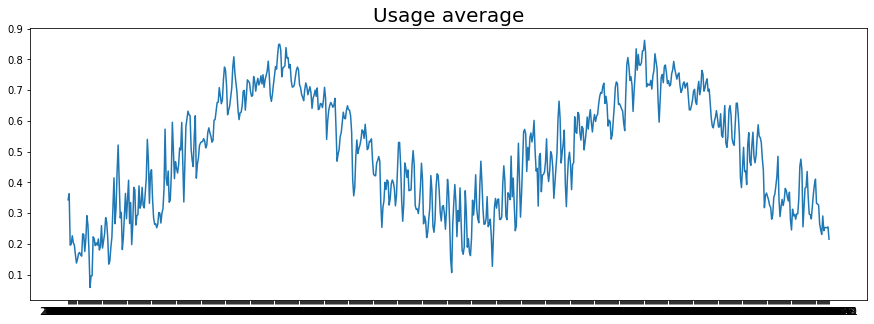

In [33]:
plt.figure(figsize=(15,5))
plt.plot(dates, temp)
plt.title('Usage average',
          fontsize=20);

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(dates, temp, test_size=0.2)

In [38]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [39]:
train_set = windowed_dataset(Y_train, window_size=60, batch_size=100, shuffle_buffer=1000)
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
])

In [40]:
optimizer = tf.keras.optimizers.SGD(lr=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set,epochs=100)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
6/6 [==============================] - 4s 96ms/step - loss: 0.1625 - mae: 0.5407
Epoch 2/100
6/6 [==============================] - 1s 85ms/step - loss: 0.1588 - mae: 0.5338
Epoch 3/100
6/6 [==============================] - 1s 84ms/step - loss: 0.1532 - mae: 0.5231
Epoch 4/100
6/6 [==============================] - 1s 84ms/step - loss: 0.1470 - mae: 0.5112
Epoch 5/100
6/6 [==============================] - 1s 88ms/step - loss: 0.1417 - mae: 0.5009
Epoch 6/100
6/6 [==============================] - 1s 84ms/step - loss: 0.1367 - mae: 0.4908
Epoch 7/100
6/6 [==============================] - 1s 82ms/step - loss: 0.1324 - mae: 0.4819
Epoch 8/100
6/6 [==============================] - 1s 93ms/step - loss: 0.1287 - mae: 0.4743
Epoch 9/100
6/6 [==============================] - 1s 84ms/step - loss: 0.1254 - mae: 0.4672
Epoch 10/100
6/6 [==============================] - 1s 84ms/step - loss: 0.1222 - mae: 0.4603
Epoch 11/100
6/6 [==============================] - 1s 82ms/step - lo